In [164]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns

In [166]:
df=pd.read_excel("DEN airport.xlsx")

In [168]:
df.head()

,Month and Year,Month,Enplaned,Deplaned,Transfer,Originating,Destination,Concession,Parking,Rental Car,Ground,Origin + Destin,UMCSENT,Cannibas?,UMCSENTLag1,UMCSENTLag2,UMCSENTLag3
0,2012-01-12 00:00:00,Jan,1966776,1938362,1780281,1085973,1038884,3591671.0,9678176.0,2670334.0,434260.0,2124857,75.0,no hype,NaN,NaN,NaN
1,2012-02-12 00:00:00,Feb,1874278,1884741,1708859,1031341,1018819,3369432.0,9819409.0,2699548.0,377700.0,2050160,75.3,no hype,75.0,NaN,NaN
2,2012-03-12 00:00:00,Mar,2247252,2210792,1822664,1331306,1304074,3698607.0,11429424.0,3049904.0,509457.0,2635380,76.2,no hype,75.3,75.0,NaN
3,2012-04-12 00:00:00,Apr,2068091,2069668,1912797,1118215,1106747,3581291.0,11334077.0,2424599.0,525465.0,2224962,76.4,no hype,76.2,75.3,75.0
4,2012-05-12 00:00:00,May,2277760,2254178,2061760,1252769,1217409,3679780.0,11512100.0,2570343.0,442073.0,2470178,79.3,no hype,76.4,76.2,75.3


1. Summary and revenue Distribution

In [171]:
df.isnull().sum()

Month and Year     0
Month              0
Enplaned           0
Deplaned           0
Transfer           0
Originating        0
Destination        0
Concession         0
Parking            0
Rental Car         0
Ground             0
Origin + Destin    0
UMCSENT            0
Cannibas?          0
UMCSENTLag1        1
UMCSENTLag2        2
UMCSENTLag3        3
dtype: int64

We transformed the month column to remove the null values manually as month had 54 null values. We transformed the month column and generalized it to "mmmm-yy" format.

In [174]:
columns_for_calculations = ['Enplaned', 'Deplaned', 'Transfer', 'Originating', 'Destination','Concession','Parking','Rental Car','Ground','UMCSENT'] #declaring the column names used for calculations
statistics_summary = {} #empty dictionary for storing the values
for column in columns_for_calculations:
    data = df[column]
    statistics_summary[column] = {
        'length': len(data),
        'sum': data.sum(),
        'mean': data.mean(),
        'median': data.median(),
        'variance': data.var(),
        'std_dev': data.std(),
        'min': data.min(),
        'max': data.max(),
        'summary': data.describe().to_dict()
    }

In [176]:
for column, stats in statistics_summary.items():
    print(f"Statistics for {column}:")
    for stat, value in stats.items():
        print(f"  {stat}: {value}")
    print("\n")

Statistics for Enplaned:
  length: 120
  sum: 279556111
  mean: 2329634.2583333333
  median: 2373485.0
  variance: 258856360023.5545
  std_dev: 508779.2841926197
  min: 149805
  max: 3352265
  summary: {'count': 120.0, 'mean': 2329634.2583333333, 'std': 508779.2841926197, 'min': 149805.0, '25%': 2132847.25, '50%': 2373485.0, '75%': 2643100.25, 'max': 3352265.0}


Statistics for Deplaned:
  length: 120
  sum: 279369346
  mean: 2328077.8833333333
  median: 2390492.0
  variance: 261879725429.3308
  std_dev: 511741.8542872283
  min: 149293
  max: 3380421
  summary: {'count': 120.0, 'mean': 2328077.8833333333, 'std': 511741.8542872283, 'min': 149293.0, '25%': 2131029.0, '50%': 2390492.0, '75%': 2629509.5, 'max': 3380421.0}


Statistics for Transfer:
  length: 120
  sum: 214758598
  mean: 1789654.9833333334
  median: 1830309.5
  variance: 130228900670.65512
  std_dev: 360872.41605677636
  min: 112074
  max: 2483762
  summary: {'count': 120.0, 'mean': 1789654.9833333334, 'std': 360872.4160567

Revenue distribution

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


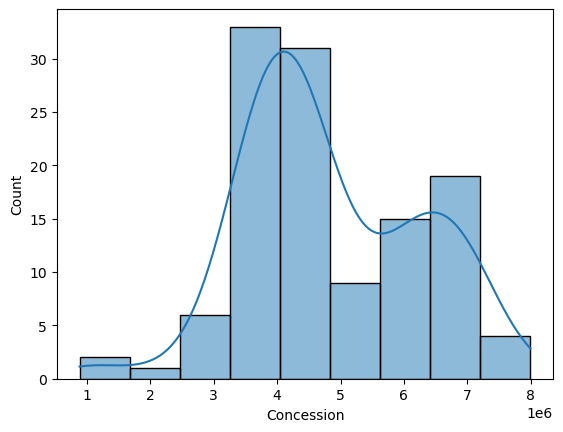

In [179]:
sns.histplot(df["Concession"],kde=True, edgecolor="black")
plt.show()

In [181]:
from scipy.stats import skew, kurtosis

In [183]:
skew(df["Concession"])

0.13914318668680253

In [185]:
kurtosis(df["Concession"])

-0.32850959032878624

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


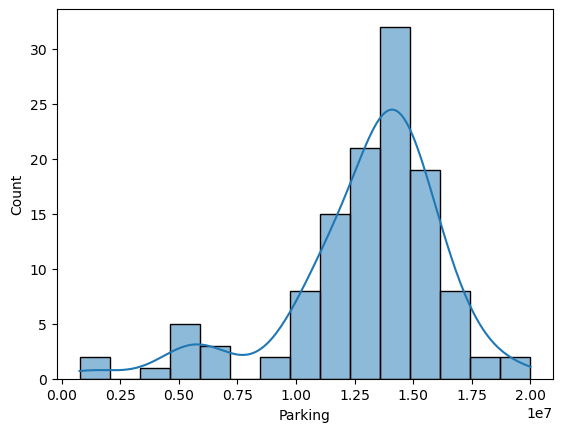

In [187]:
sns.histplot(df["Parking"],kde=True, edgecolor="black")
plt.show()

In [189]:
skew(df["Parking"])

-1.3189628233530801

In [191]:
kurtosis(df["Parking"])

2.3285238357640505

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


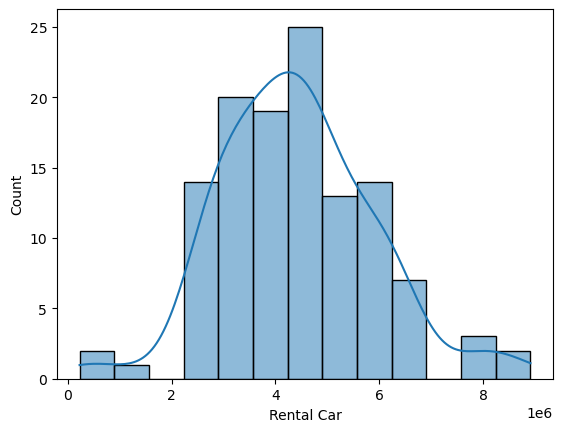

In [193]:
sns.histplot(df["Rental Car"],kde=True, edgecolor="black")
plt.show()

In [195]:
skew(df["Rental Car"])

0.3270522200787964

In [197]:
kurtosis(df["Rental Car"])

0.7802786443401573

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


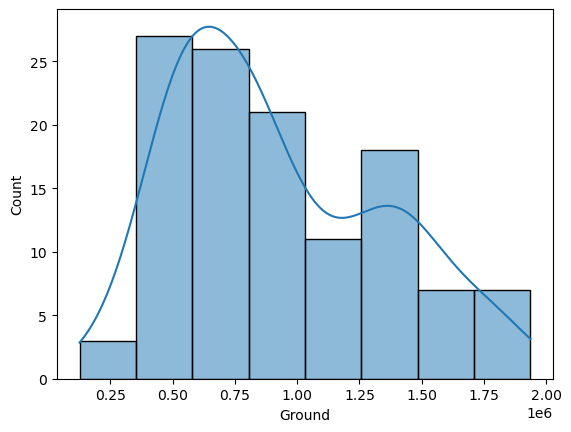

In [199]:
sns.histplot(df["Ground"],kde=True, edgecolor="black")
plt.show()

In [201]:
skew(df["Ground"])

0.5670707230063515

In [203]:
kurtosis(df["Ground"])

-0.7049024649100253

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


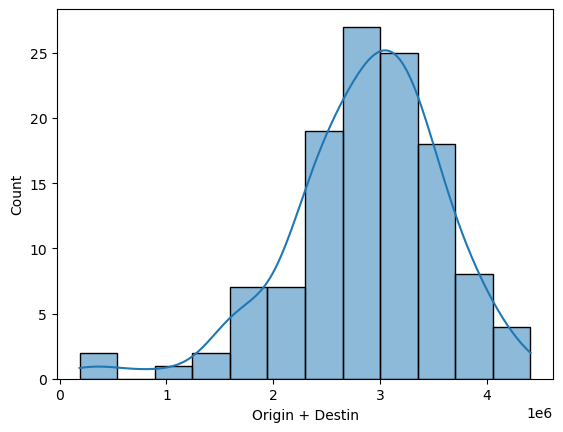

In [205]:
sns.histplot(df["Origin + Destin"],kde=True, edgecolor="black")
plt.show()

In [207]:
skew(df["Origin + Destin"])

-0.8650516392420532

In [209]:
kurtosis(df["Origin + Destin"])

1.701622848868209

In [211]:
#Replacing the cannibas to 0,1 labels
df['Cannibas?'] = df['Cannibas?'].replace({'hype': 1, 'no hype': 0})

In [213]:
df.tail()

,Month and Year,Month,Enplaned,Deplaned,Transfer,Originating,Destination,Concession,Parking,Rental Car,Ground,Origin + Destin,UMCSENT,Cannibas?,UMCSENTLag1,UMCSENTLag2,UMCSENTLag3
115,Aug-21,Aug,2963413,2979261,2483762,1723653,1735259,6616945.73,15076437.36,8049807.40,1403114.89,3458912,70.3,1,81.2,85.5,82.9
116,Sep-21,Sep,2733662,2731219,2235427,1617054,1612400,6548533.36,13510692.14,6098400.93,1373934.90,3229454,72.8,1,70.3,81.2,85.5
117,Oct-21,Oct,2858983,2840374,2277084,1722118,1700155,6922970.86,14576746.55,5603243.08,1498939.33,3422273,71.7,1,72.8,70.3,81.2
118,Nov-21,Nov,2648705,2636152,2195598,1552090,1537169,6757514.52,14803680.40,3710563.38,1396651.15,3089259,67.4,1,71.7,72.8,70.3
119,Dec-21,Dec,2663819,2703788,2156891,1590126,1620590,7995786.50,13629096.56,4922184.82,1342925.23,3210716,70.6,1,67.4,71.7,72.8


In [215]:
df.head(20)

,Month and Year,Month,Enplaned,Deplaned,Transfer,Originating,Destination,Concession,Parking,Rental Car,Ground,Origin + Destin,UMCSENT,Cannibas?,UMCSENTLag1,UMCSENTLag2,UMCSENTLag3
0,2012-01-12 00:00:00,Jan,1966776,1938362,1780281,1085973,1038884,3591671.0,9678176.0,2670334.0,434260.0,2124857,75.0,0,NaN,NaN,NaN
1,2012-02-12 00:00:00,Feb,1874278,1884741,1708859,1031341,1018819,3369432.0,9819409.0,2699548.0,377700.0,2050160,75.3,0,75.0,NaN,NaN
2,2012-03-12 00:00:00,Mar,2247252,2210792,1822664,1331306,1304074,3698607.0,11429424.0,3049904.0,509457.0,2635380,76.2,0,75.3,75.0,NaN
3,2012-04-12 00:00:00,Apr,2068091,2069668,1912797,1118215,1106747,3581291.0,11334077.0,2424599.0,525465.0,2224962,76.4,0,76.2,75.3,75.0
4,2012-05-12 00:00:00,May,2277760,2254178,2061760,1252769,1217409,3679780.0,11512100.0,2570343.0,442073.0,2470178,79.3,0,76.4,76.2,75.3
5,2012-06-12 00:00:00,Jun,2391685,2426512,2086398,1357841,1373958,3935259.0,11833366.0,3122553.0,353473.0,2731799,73.2,0,79.3,76.4,76.2
6,2012-07-12 00:00:00,Jul,2542312,2547189,2201425,1451117,1436959,4177290.0,10976614.0,4251575.0,492983.0,2888076,72.3,0,73.2,79.3,76.4
7,2012-08-12 00:00:00,Aug,2536837,2546681,2265845,1412173,1405500,4039993.0,11322704.0,4650135.0,468908.0,2817673,74.3,0,72.3,73.2,79.3
8,2012-09-12 00:00:00,Sep,2199542,2179507,2030697,1189458,1158894,3545086.0,10671328.0,2918345.0,456854.0,2348352,78.3,0,74.3,72.3,73.2
9,2012-10-12 00:00:00,Oct,2265615,2239938,2068797,1237738,1199018,3769996.0,12327459.0,2599231.0,524540.0,2436756,82.6,0,78.3,74.3,72.3


In [217]:
hype=df[df["Cannibas?"]==1]["Cannibas?"].count()

In [219]:
hype

96

In [221]:
nohype=df[df["Cannibas?"]==0]["Cannibas?"].count()

In [223]:
nohype

24

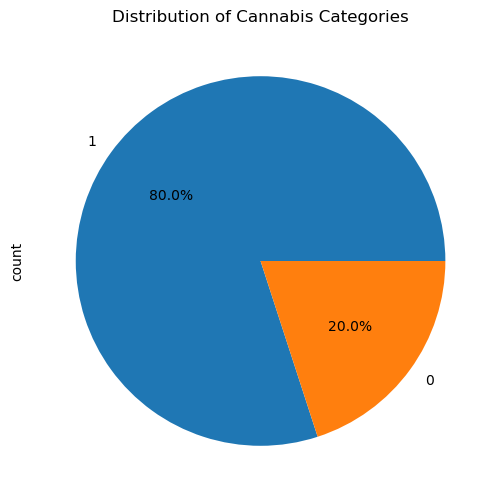

In [225]:
plt.figure(figsize=(8, 6))
df["Cannibas?"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title('Distribution of Cannabis Categories')
plt.show()

2. Time Series Plots

In [228]:
monthly=df.groupby("Month")[["Concession","Parking","Rental Car","Ground"]].sum()
monthly

,Concession,Parking,Rental Car,Ground
Month,,,,
Apr,42337547.75,1.271279e+08,34589928.79,8021067.80
Aug,53258701.72,1.328988e+08,58702536.25,9210067.78
Dec,50221362.10,1.249442e+08,36807221.80,9927006.50
Feb,43655548.73,1.158585e+08,41532364.65,8635791.84
Jan,43137435.46,1.170911e+08,40737786.06,8717911.48
Jul,53556293.96,1.343778e+08,60273368.69,9862565.93
Jun,49230312.18,1.356641e+08,43579730.42,9424389.17
Mar,45044300.15,1.302930e+08,45870299.46,8682229.73
May,46869744.82,1.316942e+08,35073072.11,8879579.96


In [230]:
monthly.sort_values(by="Month",ascending=True)

,Concession,Parking,Rental Car,Ground
Month,,,,
Apr,42337547.75,1.271279e+08,34589928.79,8021067.80
Aug,53258701.72,1.328988e+08,58702536.25,9210067.78
Dec,50221362.10,1.249442e+08,36807221.80,9927006.50
Feb,43655548.73,1.158585e+08,41532364.65,8635791.84
Jan,43137435.46,1.170911e+08,40737786.06,8717911.48
Jul,53556293.96,1.343778e+08,60273368.69,9862565.93
Jun,49230312.18,1.356641e+08,43579730.42,9424389.17
Mar,45044300.15,1.302930e+08,45870299.46,8682229.73
May,46869744.82,1.316942e+08,35073072.11,8879579.96


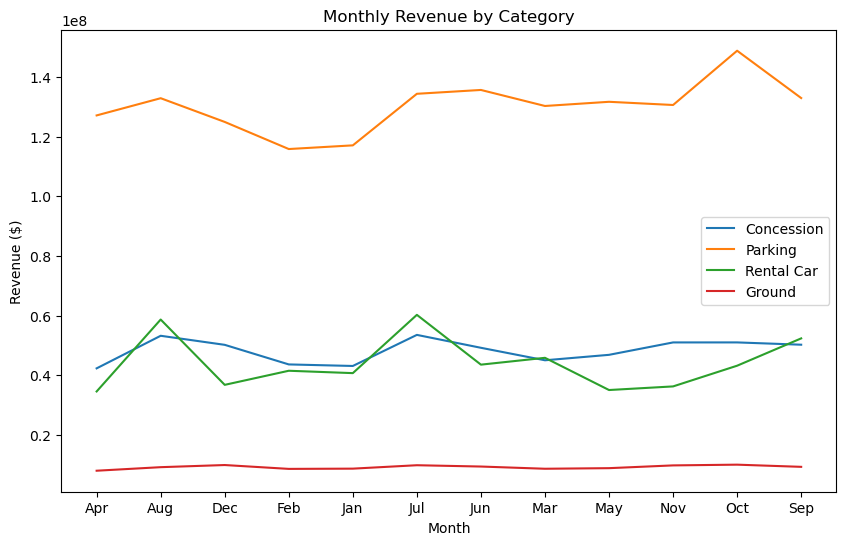

In [232]:
import matplotlib.pyplot as plt

# Plot each revenue category as a line on the same plot
plt.figure(figsize=(10, 6))

for column in monthly.columns:
    plt.plot(monthly.index, monthly[column], label=column)

# Adding labels and title
plt.title('Monthly Revenue by Category')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.legend()

# Display the plot
plt.show()


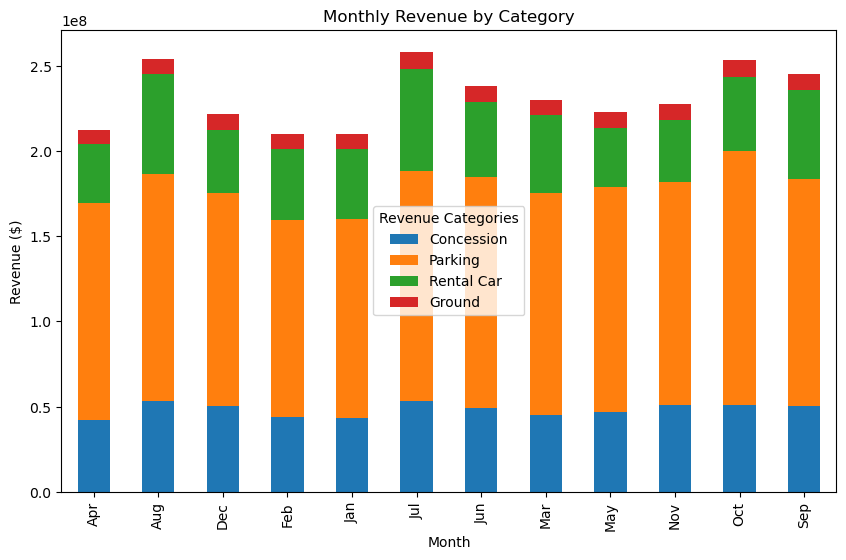

In [234]:
# Plot as a bar chart with monthly revenue breakdown
monthly.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Monthly Revenue by Category')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.legend(title="Revenue Categories")

# Show the plot
plt.show()


In [236]:
#Create a new column that only consists of the year so that we can do yearly time series analysis.
df['Month and Year'] = pd.to_datetime(df['Month and Year'], format='%b-%y')

# Step 2: Extract the year
df['Year'] = df['Month and Year'].dt.year

In [238]:
df["Year"]

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
115    2021
116    2021
117    2021
118    2021
119    2021
Name: Year, Length: 120, dtype: int32

In [240]:
df.head()

,Month and Year,Month,Enplaned,Deplaned,Transfer,Originating,Destination,Concession,Parking,Rental Car,Ground,Origin + Destin,UMCSENT,Cannibas?,UMCSENTLag1,UMCSENTLag2,UMCSENTLag3,Year
0,2012-01-12,Jan,1966776,1938362,1780281,1085973,1038884,3591671.0,9678176.0,2670334.0,434260.0,2124857,75.0,0,NaN,NaN,NaN,2012
1,2012-02-12,Feb,1874278,1884741,1708859,1031341,1018819,3369432.0,9819409.0,2699548.0,377700.0,2050160,75.3,0,75.0,NaN,NaN,2012
2,2012-03-12,Mar,2247252,2210792,1822664,1331306,1304074,3698607.0,11429424.0,3049904.0,509457.0,2635380,76.2,0,75.3,75.0,NaN,2012
3,2012-04-12,Apr,2068091,2069668,1912797,1118215,1106747,3581291.0,11334077.0,2424599.0,525465.0,2224962,76.4,0,76.2,75.3,75.0,2012
4,2012-05-12,May,2277760,2254178,2061760,1252769,1217409,3679780.0,11512100.0,2570343.0,442073.0,2470178,79.3,0,76.4,76.2,75.3,2012


In [242]:
yearly=df.groupby("Year")[["Concession","Parking","Rental Car","Ground"]].sum()
yearly

,Concession,Parking,Rental Car,Ground
Year,,,,
2012,44789740.00,1.319791e+08,36399102.00,5481375.00
2013,46640965.00,1.531681e+08,40166769.00,6422518.00
2014,49147823.00,1.616135e+08,50265944.00,7426596.00
2015,52633191.00,1.722484e+08,53695842.00,9668777.00
2016,60397196.00,1.706075e+08,56800775.00,10593574.00
2017,63328327.00,1.695978e+08,60698927.00,12441903.00
2018,75166265.15,1.832999e+08,63013069.59,16230779.93
2019,80825185.07,1.963361e+08,68947895.45,19970373.36
2020,39887418.08,8.216439e+07,35618642.91,8529599.75


In [244]:
df.tail()

,Month and Year,Month,Enplaned,Deplaned,Transfer,Originating,Destination,Concession,Parking,Rental Car,Ground,Origin + Destin,UMCSENT,Cannibas?,UMCSENTLag1,UMCSENTLag2,UMCSENTLag3,Year
115,2021-08-01,Aug,2963413,2979261,2483762,1723653,1735259,6616945.73,15076437.36,8049807.40,1403114.89,3458912,70.3,1,81.2,85.5,82.9,2021
116,2021-09-01,Sep,2733662,2731219,2235427,1617054,1612400,6548533.36,13510692.14,6098400.93,1373934.90,3229454,72.8,1,70.3,81.2,85.5,2021
117,2021-10-01,Oct,2858983,2840374,2277084,1722118,1700155,6922970.86,14576746.55,5603243.08,1498939.33,3422273,71.7,1,72.8,70.3,81.2,2021
118,2021-11-01,Nov,2648705,2636152,2195598,1552090,1537169,6757514.52,14803680.40,3710563.38,1396651.15,3089259,67.4,1,71.7,72.8,70.3,2021
119,2021-12-01,Dec,2663819,2703788,2156891,1590126,1620590,7995786.50,13629096.56,4922184.82,1342925.23,3210716,70.6,1,67.4,71.7,72.8,2021


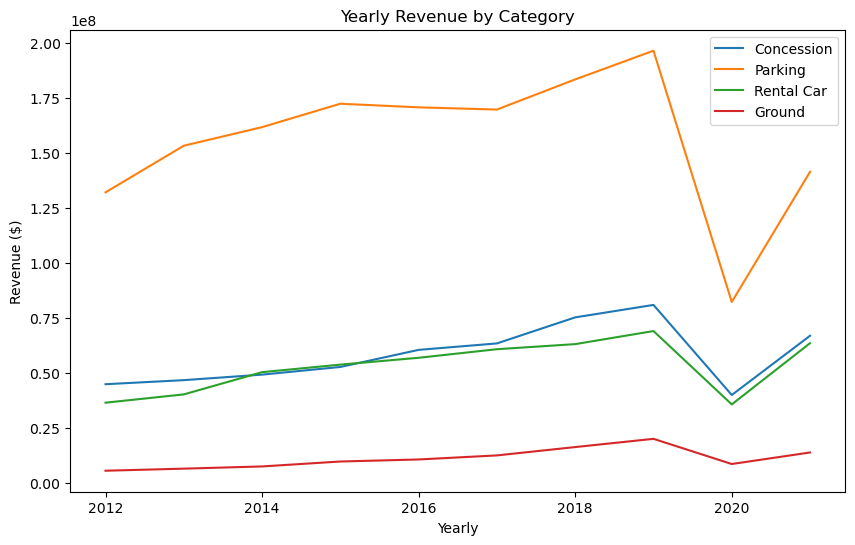

In [246]:
import matplotlib.pyplot as plt

# Plot each revenue category as a line on the same plot
plt.figure(figsize=(10, 6))

for column in yearly.columns:
    plt.plot(yearly.index, yearly[column], label=column)

# Adding labels and title
plt.title('Yearly Revenue by Category')
plt.xlabel('Yearly')
plt.ylabel('Revenue ($)')
plt.legend()

# Display the plot
plt.show()


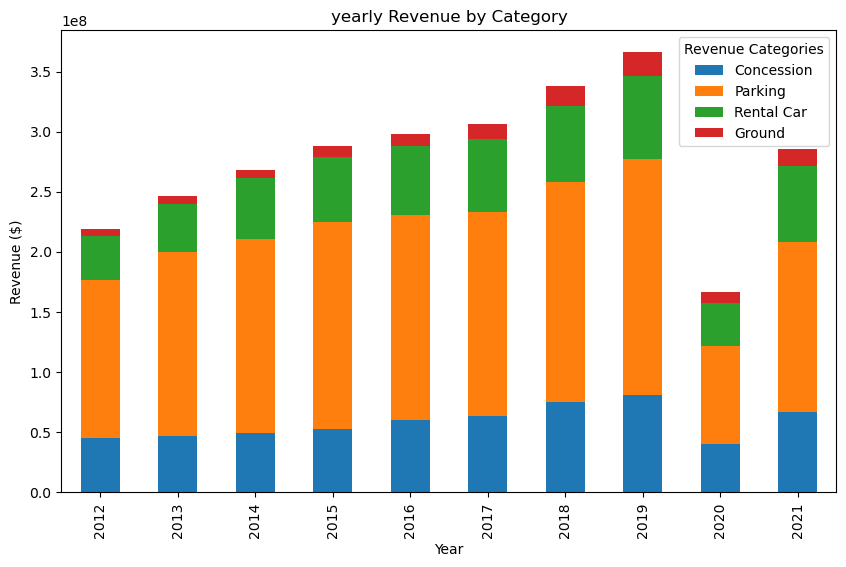

In [248]:
# Plot as a bar chart with monthly revenue breakdown
yearly.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('yearly Revenue by Category')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.legend(title="Revenue Categories")

# Show the plot
plt.show()


In [250]:
 #Mapping of months to seasons
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring',
    'Apr': 'Spring', 'May': 'Spring', 'Jun': 'Summer',
    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Fall',
    'Oct': 'Fall', 'Nov': 'Fall', 'Dec': 'Winter'
}

# Apply the mapping to create a new column 'Season'
df['Season'] = df['Month'].map(season_mapping)

# Group by Season
grouped = df.groupby('Season')

# Display the result
for season, group in grouped:
    print(f"{season}: {group['Month'].tolist()}")

Fall: ['Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov', 'Sep', 'Oct', 'Nov']
Spring: ['Mar', 'Apr', 'May', 'Mar', 'Apr', 'May', 'Mar', 'Apr', 'May', 'Mar', 'Apr', 'May', 'Mar', 'Apr', 'May', 'Mar', 'Apr', 'May', 'Mar', 'Apr', 'May', 'Mar', 'Apr', 'May', 'Mar', 'Apr', 'May', 'Mar', 'Apr', 'May']
Summer: ['Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug', 'Jun', 'Jul', 'Aug']
Winter: ['Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec', 'Jan', 'Feb', 'Dec']


In [252]:
df.head()

,Month and Year,Month,Enplaned,Deplaned,Transfer,Originating,Destination,Concession,Parking,Rental Car,Ground,Origin + Destin,UMCSENT,Cannibas?,UMCSENTLag1,UMCSENTLag2,UMCSENTLag3,Year,Season
0,2012-01-12,Jan,1966776,1938362,1780281,1085973,1038884,3591671.0,9678176.0,2670334.0,434260.0,2124857,75.0,0,NaN,NaN,NaN,2012,Winter
1,2012-02-12,Feb,1874278,1884741,1708859,1031341,1018819,3369432.0,9819409.0,2699548.0,377700.0,2050160,75.3,0,75.0,NaN,NaN,2012,Winter
2,2012-03-12,Mar,2247252,2210792,1822664,1331306,1304074,3698607.0,11429424.0,3049904.0,509457.0,2635380,76.2,0,75.3,75.0,NaN,2012,Spring
3,2012-04-12,Apr,2068091,2069668,1912797,1118215,1106747,3581291.0,11334077.0,2424599.0,525465.0,2224962,76.4,0,76.2,75.3,75.0,2012,Spring
4,2012-05-12,May,2277760,2254178,2061760,1252769,1217409,3679780.0,11512100.0,2570343.0,442073.0,2470178,79.3,0,76.4,76.2,75.3,2012,Spring


In [254]:
season=df.groupby("Season")[["Concession","Parking","Rental Car","Ground"]].sum()
season

,Concession,Parking,Rental Car,Ground
Season,,,,
Fall,1.523260e+08,4.123893e+08,1.318927e+08,29178631.99
Spring,1.342516e+08,3.891151e+08,1.155333e+08,25582877.49
Summer,1.560453e+08,4.029408e+08,1.625556e+08,28497022.88
Winter,1.370143e+08,3.578937e+08,1.190774e+08,27280709.82


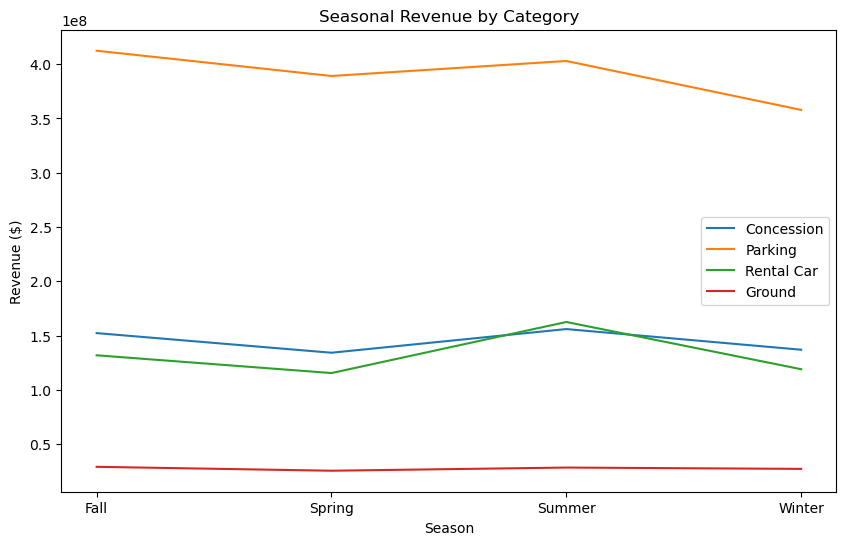

In [256]:
import matplotlib.pyplot as plt

# Plot each revenue category as a line on the same plot
plt.figure(figsize=(10, 6))

for column in season.columns:
    plt.plot(season.index, season[column], label=column)

# Adding labels and title
plt.title('Seasonal Revenue by Category')
plt.xlabel('Season')
plt.ylabel('Revenue ($)')
plt.legend()

# Display the plot
plt.show()


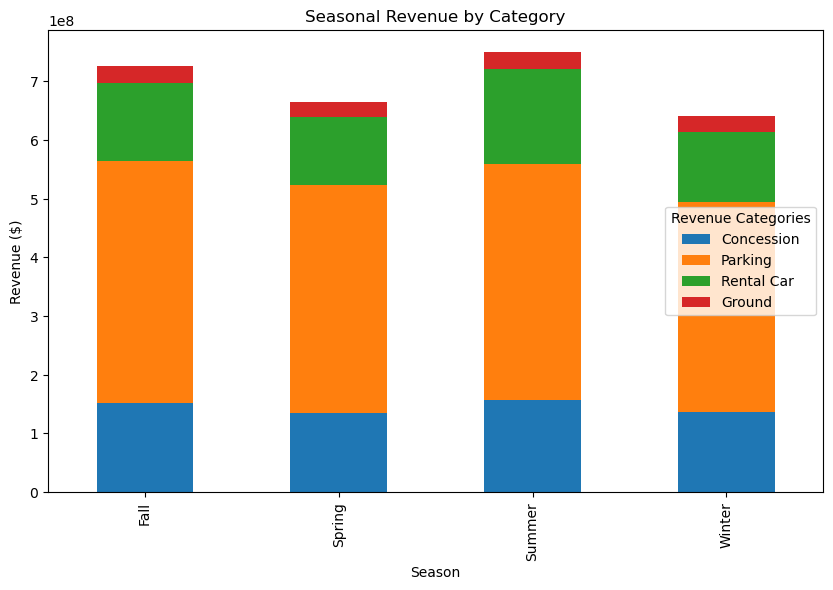

In [258]:
# Plot as a bar chart with monthly revenue breakdown
season.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Seasonal Revenue by Category')
plt.xlabel('Season')
plt.ylabel('Revenue ($)')
plt.legend(title="Revenue Categories")

# Show the plot
plt.show()


3. Correlations

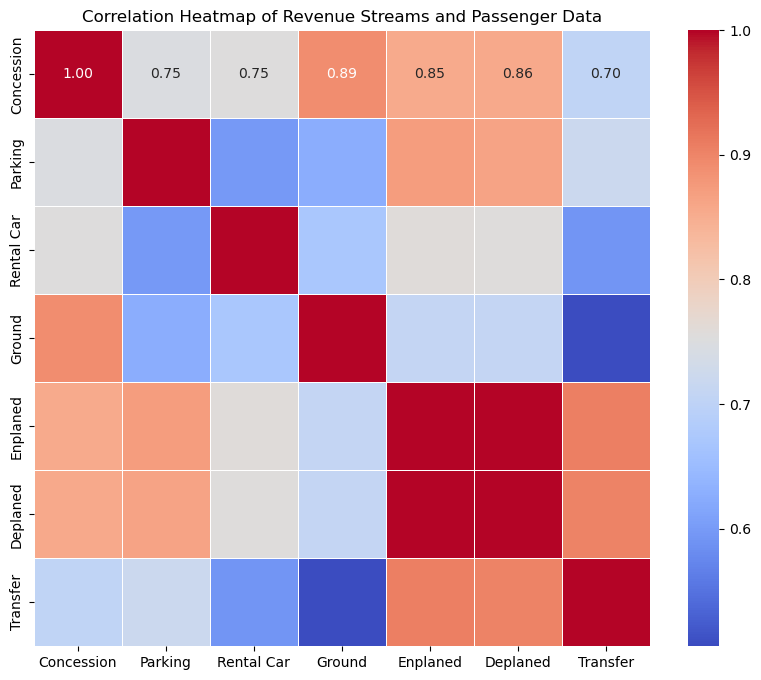

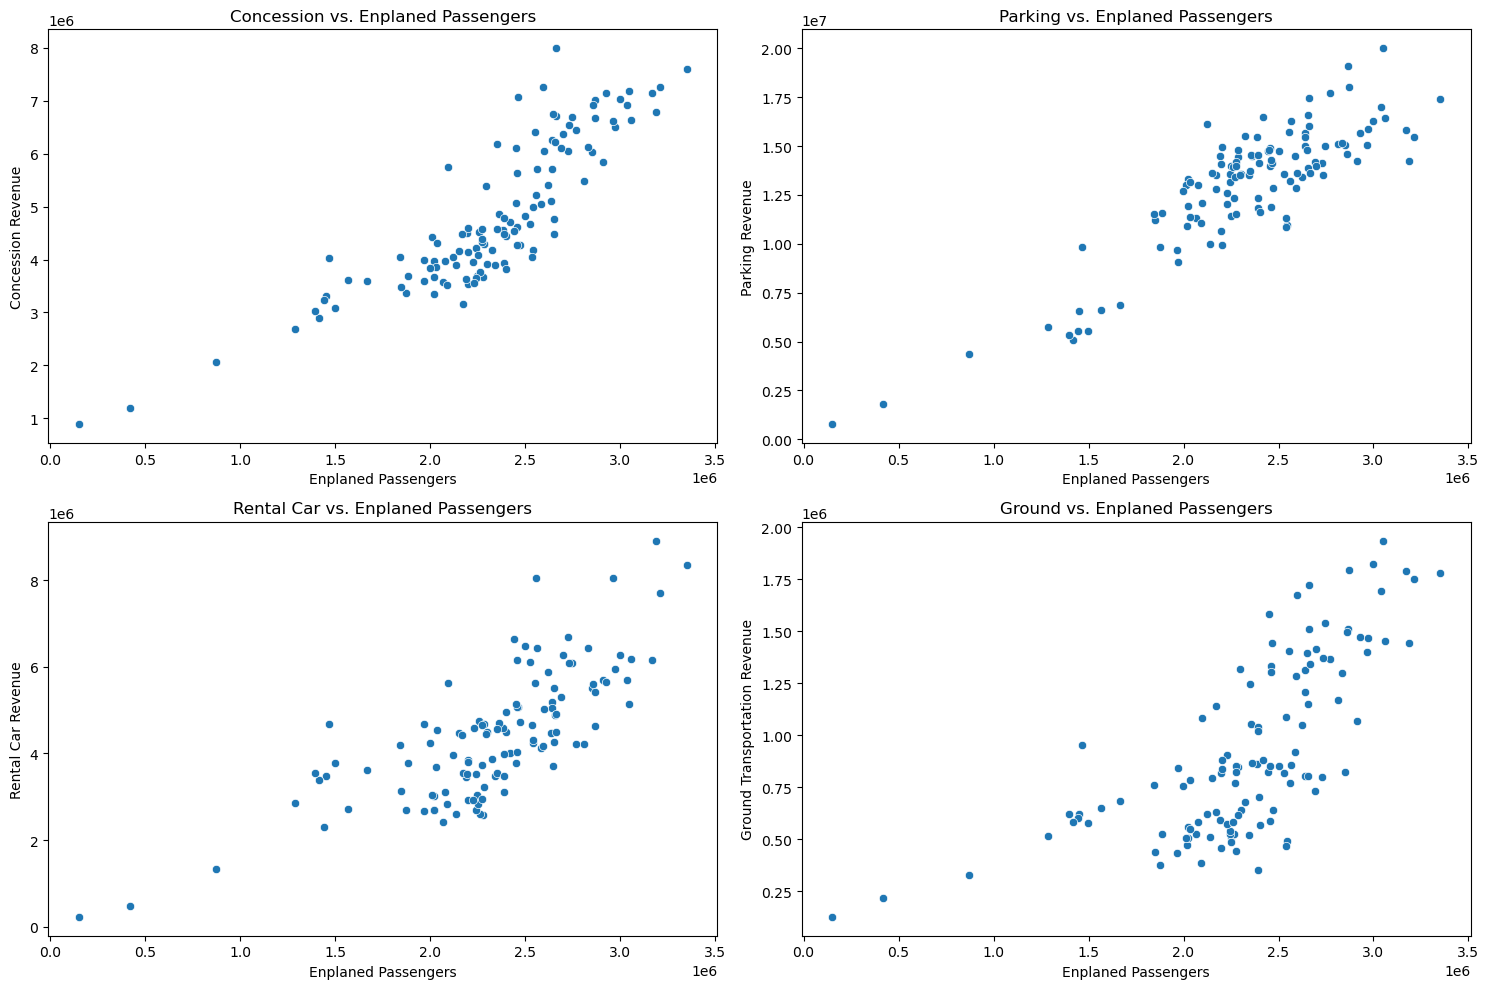

In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_columns = ['Concession', 'Parking', 'Rental Car', 'Ground', 
                       'Enplaned', 'Deplaned', 'Transfer']
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Revenue Streams and Passenger Data')
plt.show()

plt.figure(figsize=(15, 10))

# Scatterplot for Concession vs. Enplaned
plt.subplot(2, 2, 1)
sns.scatterplot(x='Enplaned', y='Concession', data=df)
plt.title('Concession vs. Enplaned Passengers')
plt.xlabel('Enplaned Passengers')
plt.ylabel('Concession Revenue')

# Scatterplot for Parking vs. Enplaned
plt.subplot(2, 2, 2)
sns.scatterplot(x='Enplaned', y='Parking', data=df)
plt.title('Parking vs. Enplaned Passengers')
plt.xlabel('Enplaned Passengers')
plt.ylabel('Parking Revenue')

# Scatterplot for Rental Car vs. Enplaned
plt.subplot(2, 2, 3)
sns.scatterplot(x='Enplaned', y='Rental Car', data=df)
plt.title('Rental Car vs. Enplaned Passengers')
plt.xlabel('Enplaned Passengers')
plt.ylabel('Rental Car Revenue')

# Scatterplot for Ground vs. Enplaned
plt.subplot(2, 2, 4)
sns.scatterplot(x='Enplaned', y='Ground', data=df)
plt.title('Ground vs. Enplaned Passengers')
plt.xlabel('Enplaned Passengers')
plt.ylabel('Ground Transportation Revenue')

plt.tight_layout()
plt.show()


4. Seasonality and Trend Analysis

In [264]:
df=pd.read_excel("DEN airport.xlsx")

In [266]:
df.head()

,Month and Year,Month,Enplaned,Deplaned,Transfer,Originating,Destination,Concession,Parking,Rental Car,Ground,Origin + Destin,UMCSENT,Cannibas?,UMCSENTLag1,UMCSENTLag2,UMCSENTLag3
0,2012-01-12 00:00:00,Jan,1966776,1938362,1780281,1085973,1038884,3591671.0,9678176.0,2670334.0,434260.0,2124857,75.0,no hype,NaN,NaN,NaN
1,2012-02-12 00:00:00,Feb,1874278,1884741,1708859,1031341,1018819,3369432.0,9819409.0,2699548.0,377700.0,2050160,75.3,no hype,75.0,NaN,NaN
2,2012-03-12 00:00:00,Mar,2247252,2210792,1822664,1331306,1304074,3698607.0,11429424.0,3049904.0,509457.0,2635380,76.2,no hype,75.3,75.0,NaN
3,2012-04-12 00:00:00,Apr,2068091,2069668,1912797,1118215,1106747,3581291.0,11334077.0,2424599.0,525465.0,2224962,76.4,no hype,76.2,75.3,75.0
4,2012-05-12 00:00:00,May,2277760,2254178,2061760,1252769,1217409,3679780.0,11512100.0,2570343.0,442073.0,2470178,79.3,no hype,76.4,76.2,75.3


In [271]:
#Replacing the cannibas to 0,1 labels
df['Cannibas?'] = df['Cannibas?'].replace({'hype': 1, 'no hype': 0})

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Month and Year'], errors='coerce')  # Convert invalid dates to NaT

# Step 2: Drop rows with missing dates and set 'Date' as the index
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

# Step 3: Ensure the frequency of the index is set (monthly frequency in this case)
df = df.asfreq('M')  # 'M' is for monthly data

# Step 4: Handle missing values in the revenue column (e.g., 'Concession') - Forward fill
df['Concession'] = df['Concession'].ffill()

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
print("\n")
plt.suptitle('Decomposition of Concession Revenue')
plt.show()



NameError: name 'decomposition' is not defined

<Figure size 1200x800 with 0 Axes>

5. External Factors

In [279]:
df=pd.read_excel("DEN airport.xlsx")
df.head()

,Month and Year,Month,Enplaned,Deplaned,Transfer,Originating,Destination,Concession,Parking,Rental Car,Ground,Origin + Destin,UMCSENT,Cannibas?,UMCSENTLag1,UMCSENTLag2,UMCSENTLag3
0,2012-01-12 00:00:00,Jan,1966776,1938362,1780281,1085973,1038884,3591671.0,9678176.0,2670334.0,434260.0,2124857,75.0,no hype,NaN,NaN,NaN
1,2012-02-12 00:00:00,Feb,1874278,1884741,1708859,1031341,1018819,3369432.0,9819409.0,2699548.0,377700.0,2050160,75.3,no hype,75.0,NaN,NaN
2,2012-03-12 00:00:00,Mar,2247252,2210792,1822664,1331306,1304074,3698607.0,11429424.0,3049904.0,509457.0,2635380,76.2,no hype,75.3,75.0,NaN
3,2012-04-12 00:00:00,Apr,2068091,2069668,1912797,1118215,1106747,3581291.0,11334077.0,2424599.0,525465.0,2224962,76.4,no hype,76.2,75.3,75.0
4,2012-05-12 00:00:00,May,2277760,2254178,2061760,1252769,1217409,3679780.0,11512100.0,2570343.0,442073.0,2470178,79.3,no hype,76.4,76.2,75.3


In [280]:
# Check the first few rows of the dataset
print(df.head())

# Check the range of the 'Date' column
print(df.index.min(), df.index.max())  # This will show the minimum and maximum dates in your dataset

# Check for any missing values in the relevant columns
print(df[['UMCSENT', 'Concession', 'Parking', 'Rental Car', 'Ground']].isna().sum())


        Month and Year Month  Enplaned  Deplaned  Transfer  Originating  \
0  2012-01-12 00:00:00   Jan   1966776   1938362   1780281      1085973   
1  2012-02-12 00:00:00   Feb   1874278   1884741   1708859      1031341   
2  2012-03-12 00:00:00   Mar   2247252   2210792   1822664      1331306   
3  2012-04-12 00:00:00   Apr   2068091   2069668   1912797      1118215   
4  2012-05-12 00:00:00   May   2277760   2254178   2061760      1252769   

   Destination  Concession     Parking  Rental Car    Ground  Origin + Destin  \
0      1038884   3591671.0   9678176.0   2670334.0  434260.0          2124857   
1      1018819   3369432.0   9819409.0   2699548.0  377700.0          2050160   
2      1304074   3698607.0  11429424.0   3049904.0  509457.0          2635380   
3      1106747   3581291.0  11334077.0   2424599.0  525465.0          2224962   
4      1217409   3679780.0  11512100.0   2570343.0  442073.0          2470178   

   UMCSENT Cannibas?  UMCSENTLag1  UMCSENTLag2  UMCSENTLag3  


2012-01-12 00:00:00 2021-12-01 00:00:00


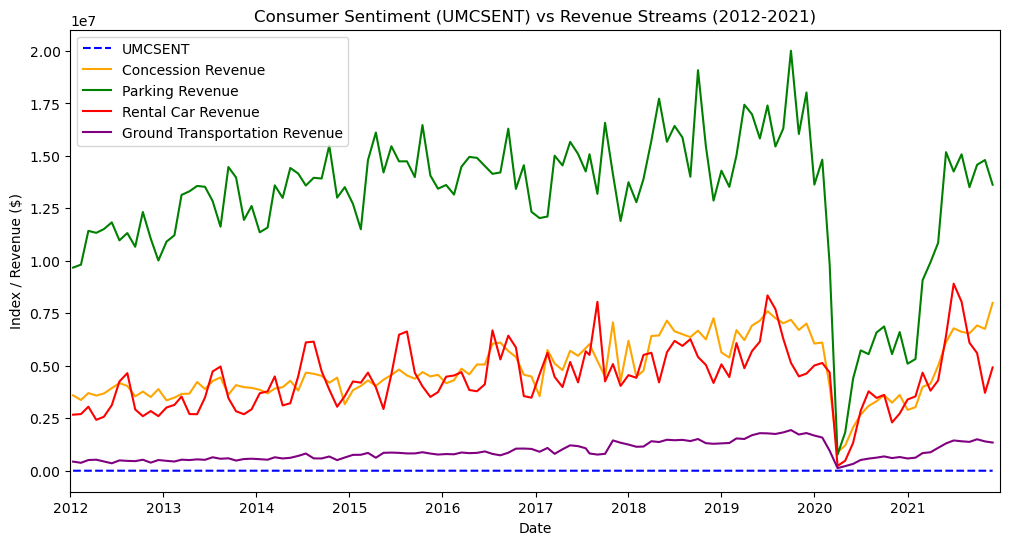

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

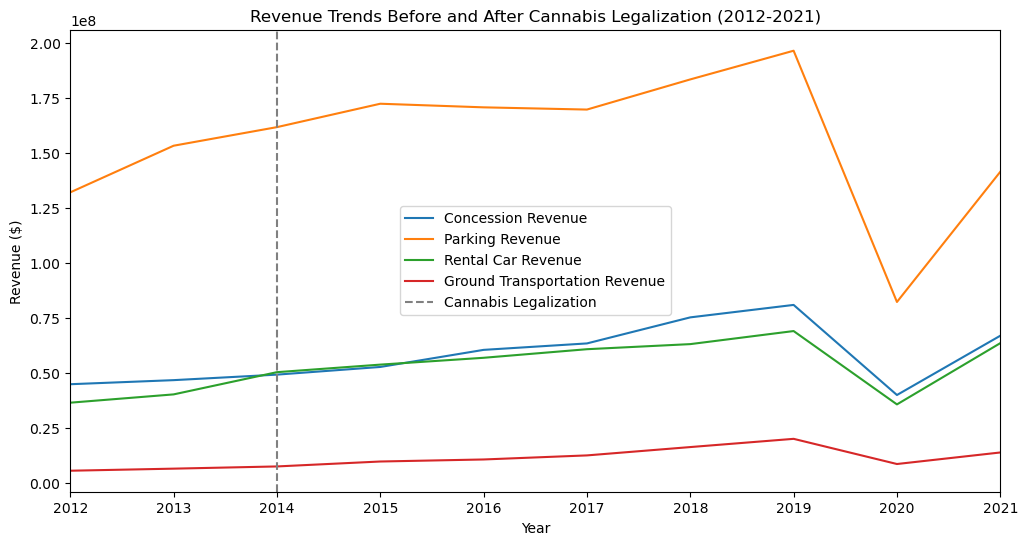

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Month and Year' column is in datetime format
df['Date'] = pd.to_datetime(df['Month and Year'], format='%b-%y')  # Adjust 'Month and Year' if needed
df.set_index('Date', inplace=True)  # Set 'Date' as the index for time series analysis

# Check the date range and adjust if needed
print(df.index.min(), df.index.max())  # Verify date range is within 2012-2021

# Visualize UMCSENT (Consumer Sentiment Index) against revenue streams
plt.figure(figsize=(12, 6))

# Plot the UMCSENT and different revenue streams
plt.plot(df['UMCSENT'], label='UMCSENT', color='blue', linestyle='--')
plt.plot(df['Concession'], label='Concession Revenue', color='orange')
plt.plot(df['Parking'], label='Parking Revenue', color='green')
plt.plot(df['Rental Car'], label='Rental Car Revenue', color='red')
plt.plot(df['Ground'], label='Ground Transportation Revenue', color='purple')

# Set x-axis limits from 2012 to 2021
plt.xlim(pd.Timestamp('2012-01-01'), pd.Timestamp('2021-12-31'))

# Adding labels and title
plt.title('Consumer Sentiment (UMCSENT) vs Revenue Streams (2012-2021)')
plt.xlabel('Date')
plt.ylabel('Index / Revenue ($)')
plt.legend()
plt.show()

# Step 4: Compare Revenue Trends Before and After Cannabis Legalization (January 2014)
# Create a 'Year' column for grouping
df['Year'] = df.index.year

# Aggregate annual revenue data
annual_revenue = df.groupby('Year')[['Concession', 'Parking', 'Rental Car', 'Ground']].sum()

# Add a column to mark whether the data is before or after legalization
annual_revenue['Legalization'] = ['Before Legalization' if year < 2014 else 'After Legalization' for year in annual_revenue.index]

# Plot the revenue trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_revenue.reset_index(), x='Year', y='Concession', label='Concession Revenue')
sns.lineplot(data=annual_revenue.reset_index(), x='Year', y='Parking', label='Parking Revenue')
sns.lineplot(data=annual_revenue.reset_index(), x='Year', y='Rental Car', label='Rental Car Revenue')
sns.lineplot(data=annual_revenue.reset_index(), x='Year', y='Ground', label='Ground Transportation Revenue')

# Mark the legalization date with a vertical line
plt.axvline(x=2014, color='gray', linestyle='--', label='Cannabis Legalization')

# Set x-axis limits from 2012 to 2021
plt.xlim(2012, 2021)

# Adding labels and title
plt.title('Revenue Trends Before and After Cannabis Legalization (2012-2021)')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.legend()
plt.show()


6. Revenue Share Analysis

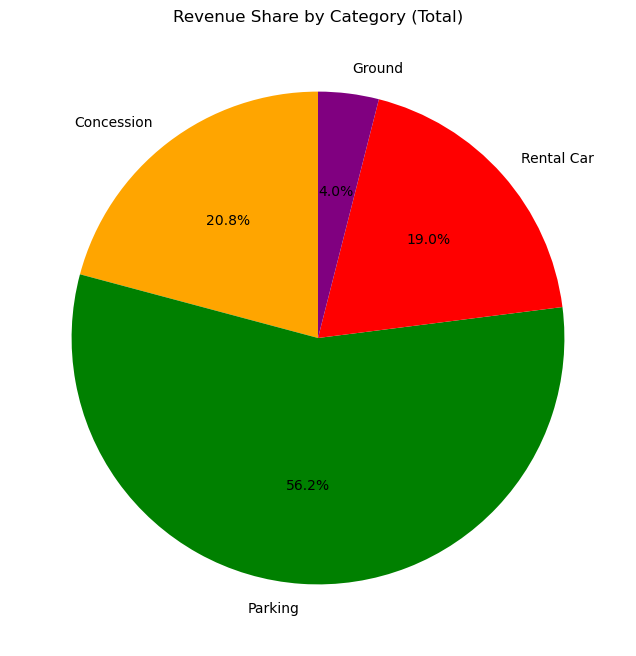

In [286]:
#Total revenue share
import pandas as pd
import matplotlib.pyplot as plt

# Example: Aggregate the total revenue for each category across the entire dataset
total_revenue = df[['Concession', 'Parking', 'Rental Car', 'Ground']].sum()

# Plot a pie chart to show the revenue breakdown
plt.figure(figsize=(8, 8))
plt.pie(total_revenue, labels=total_revenue.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'red', 'purple'])
plt.title('Revenue Share by Category (Total)')
plt.show()


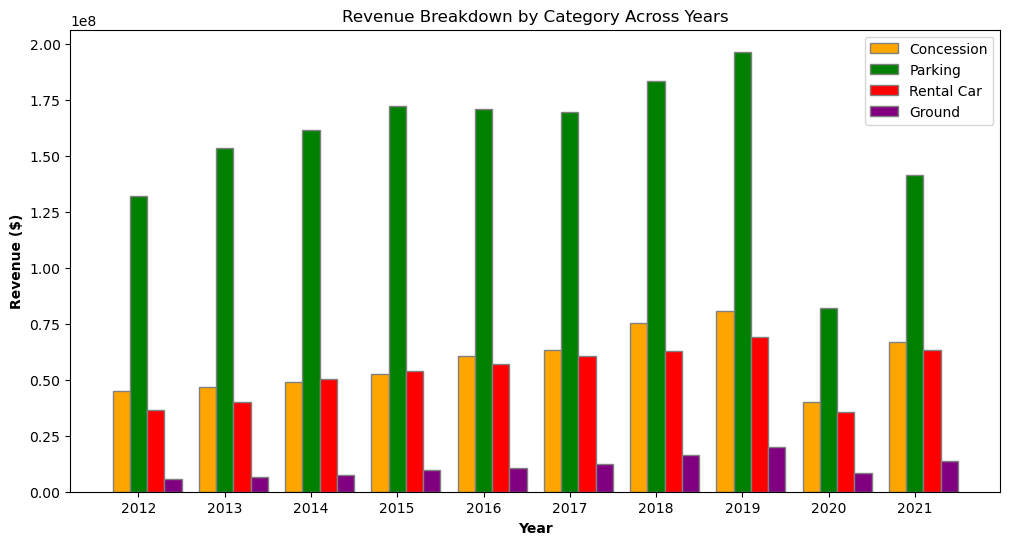

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group the data by year and sum the revenue categories
annual_revenue = df.groupby(df.index.year)[['Concession', 'Parking', 'Rental Car', 'Ground']].sum()

# Step 1: Define the width of the bars and the positions for each year
bar_width = 0.2
years = annual_revenue.index
categories = ['Concession', 'Parking', 'Rental Car', 'Ground']

# Step 2: Set up the figure and axis
plt.figure(figsize=(12, 6))
r1 = np.arange(len(years))  # Position of the bars for the first revenue category (Concession)
r2 = [x + bar_width for x in r1]  # Position of the bars for the second revenue category (Parking)
r3 = [x + bar_width for x in r2]  # Position for the third revenue category (Rental Car)
r4 = [x + bar_width for x in r3]  # Position for the fourth revenue category (Ground)

# Step 3: Plot the bars for each revenue category
plt.bar(r1, annual_revenue['Concession'], color='orange', width=bar_width, edgecolor='grey', label='Concession')
plt.bar(r2, annual_revenue['Parking'], color='green', width=bar_width, edgecolor='grey', label='Parking')
plt.bar(r3, annual_revenue['Rental Car'], color='red', width=bar_width, edgecolor='grey', label='Rental Car')
plt.bar(r4, annual_revenue['Ground'], color='purple', width=bar_width, edgecolor='grey', label='Ground')

# Step 4: Add labels and formatting
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Revenue ($)', fontweight='bold')
plt.title('Revenue Breakdown by Category Across Years')
plt.xticks([r + bar_width for r in range(len(years))], years)  # Set year labels in the center of the groups
plt.legend()

# Show the plot
plt.show()


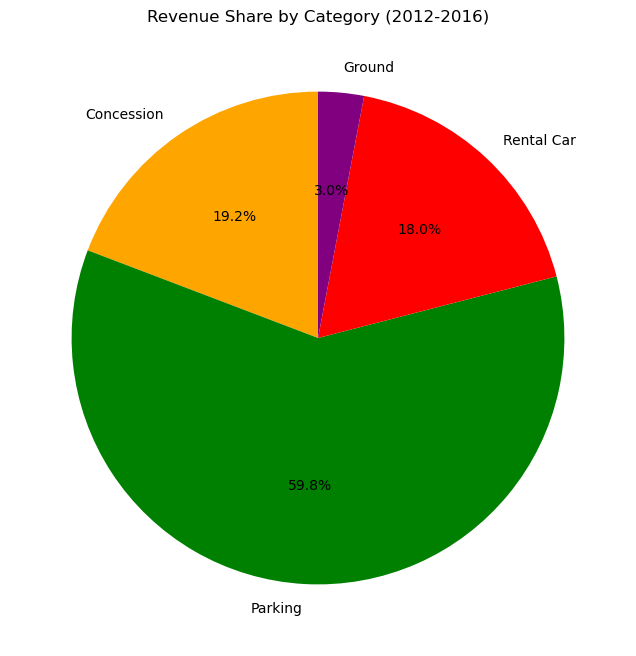

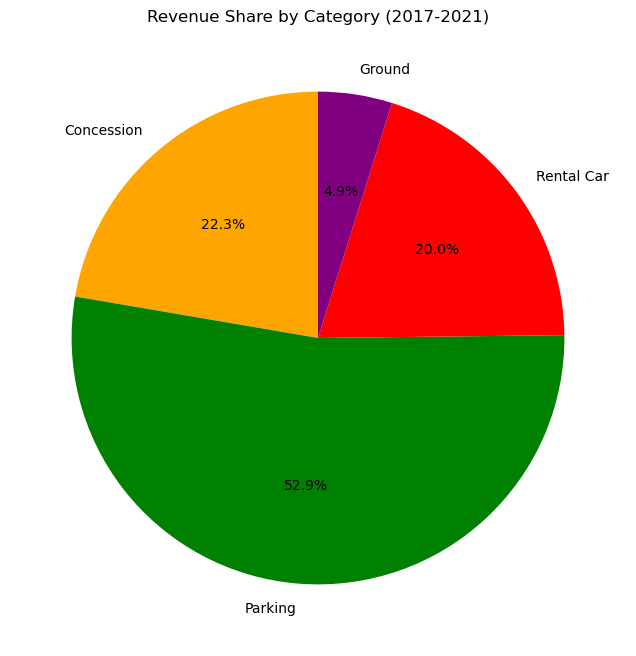

In [290]:
# comparision for range of years 2012-2016 and 2017-2021
import pandas as pd
import matplotlib.pyplot as plt

# Group data by year and sum the revenue categories
annual_revenue = df.groupby(df.index.year)[['Concession', 'Parking', 'Rental Car', 'Ground']].sum()

# Step 1: Aggregate revenue for the range 2012-2016
revenue_2012_2016 = annual_revenue.loc[2012:2016].sum()

# Step 2: Aggregate revenue for the range 2017-2021
revenue_2017_2021 = annual_revenue.loc[2017:2021].sum()

# Step 3: Plot pie chart for 2012-2016
plt.figure(figsize=(8, 8))
plt.pie(revenue_2012_2016, labels=revenue_2012_2016.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'red', 'purple'])
plt.title('Revenue Share by Category (2012-2016)')
plt.show()

# Step 4: Plot pie chart for 2017-2021
plt.figure(figsize=(8, 8))
plt.pie(revenue_2017_2021, labels=revenue_2017_2021.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'red', 'purple'])
plt.title('Revenue Share by Category (2017-2021)')
plt.show()


                            OLS Regression Results                            
Dep. Variable:             Concession   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     263.8
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.23e-51
Time:                        22:48:28   Log-Likelihood:                -1743.8
No. Observations:                 120   AIC:                             3496.
Df Residuals:                     116   BIC:                             3507.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.833e+05   1.96e+05      4.001      0.0

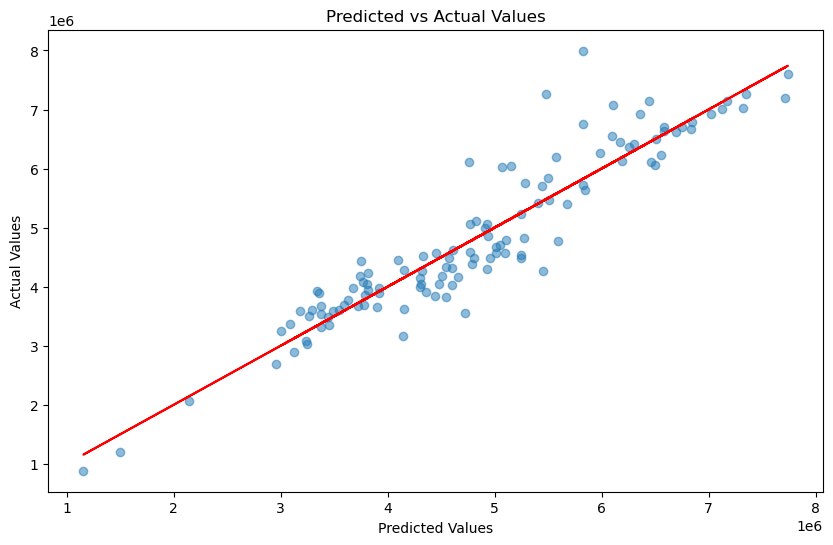

Durbin-Watson Statistic: 1.4021336420034816


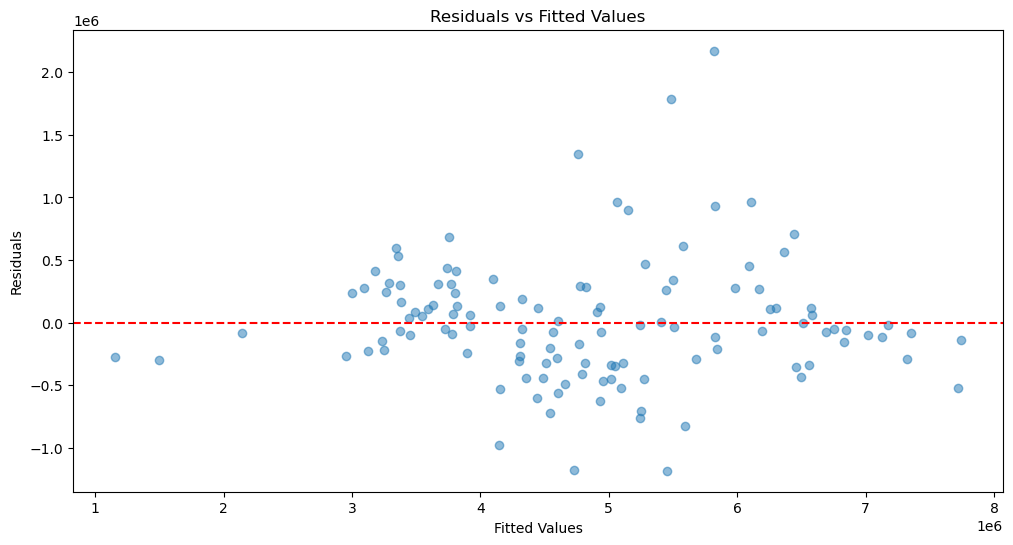

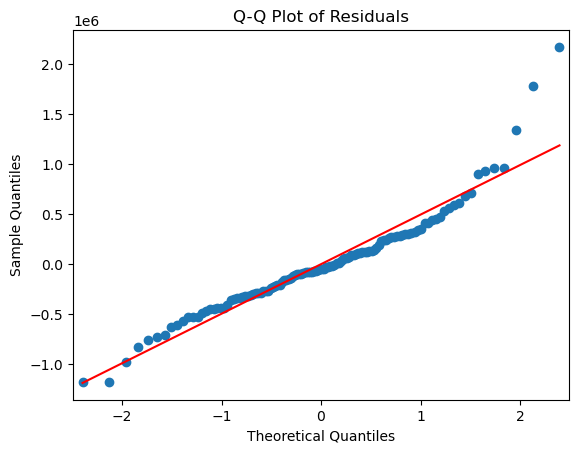

Shapiro-Wilk Test p-value: 1.4331244095551027e-05
      feature        VIF
0       const  18.118450
1     Parking   1.818270
2  Rental Car   2.003398
3      Ground   2.124676


In [292]:
# Checking assumprions of Linear Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Assuming 'df' is your DataFrame and we are predicting 'Concession' revenue based on other variables
X = df[['Parking', 'Rental Car', 'Ground']]  # Independent variables
y = df['Concession']  # Dependent variable

# Add a constant to the model (required for intercept in OLS regression)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Assumption 1: Linearity
# We check this by plotting predicted values vs actual values
predictions = model.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(predictions, y, alpha=0.5)
plt.plot(predictions, predictions, color='red')  # Line of perfect fit
plt.title('Predicted vs Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Assumption 2: Independence of Residuals
# Durbin-Watson test is used to check independence (values between 1.5 and 2.5 are considered acceptable)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model.resid)
print(f'Durbin-Watson Statistic: {dw_stat}')  # Should be between 1.5 and 2.5

# Assumption 3: Homoscedasticity (Equal variance of residuals)
# We can check this by plotting residuals vs fitted values (predicted values)
residuals = model.resid
plt.figure(figsize=(12, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Assumption 4: Normality of Residuals
# Q-Q plot to check if residuals follow a normal distribution
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Additionally, we can use the Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')  # p-value > 0.05 indicates normality

# Assumption 5: No Multicollinearity
# We use Variance Inflation Factor (VIF) to check multicollinearity (VIF > 5 indicates high multicollinearity)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)  # VIF should ideally be below 5


# Resolving Violations of Linear Regression
1. To overcome Non-Normality of dependent variable we use log transformation

                            OLS Regression Results                            
Dep. Variable:         log_Concession   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     209.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.07e-46
Time:                        22:48:29   Log-Likelihood:                 74.616
No. Observations:                 120   AIC:                            -141.2
Df Residuals:                     116   BIC:                            -130.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2678      0.051    277.849      0.0

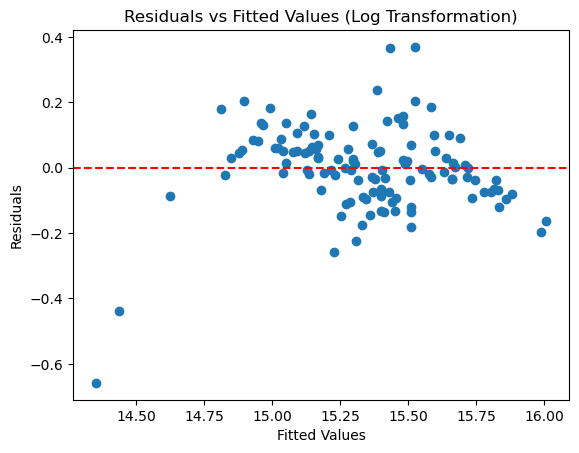

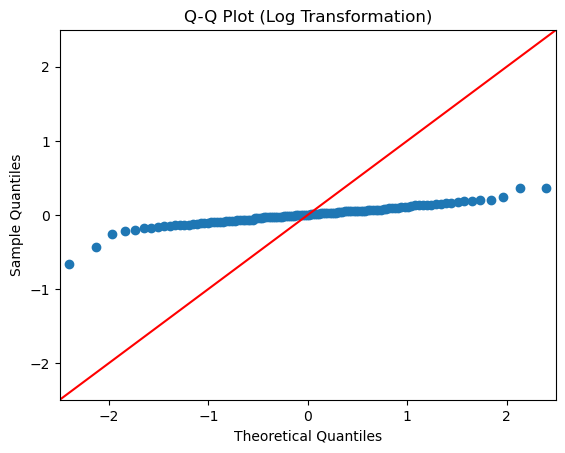

Shapiro-Wilk Test p-value (Log Transformation): 2.9197166994533057e-06


In [294]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation to the dependent variable
df['log_Concession'] = np.log(df['Concession'])

# Fit the OLS model with log-transformed dependent variable
X = df[['Parking', 'Rental Car', 'Ground']]
X = sm.add_constant(X)  # Add constant
y_log = df['log_Concession']

# Fit the new model
model_log = sm.OLS(y_log, X).fit()
print(model_log.summary())

# Step 2: Recheck assumptions

# 1. Residuals vs Fitted plot to check for homoscedasticity
fitted_values = model_log.fittedvalues
residuals = model_log.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values (Log Transformation)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Q-Q Plot to check for normality of residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot (Log Transformation)')
plt.show()

# 3. Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro_test_log = shapiro(residuals)
print("Shapiro-Wilk Test p-value (Log Transformation):", shapiro_test_log.pvalue)


                            WLS Regression Results                            
Dep. Variable:             Concession   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.625e+04
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          3.44e-172
Time:                        22:48:30   Log-Likelihood:                -1720.1
No. Observations:                 120   AIC:                             3448.
Df Residuals:                     116   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.23e+05   1.07e+05     -2.078      0.0

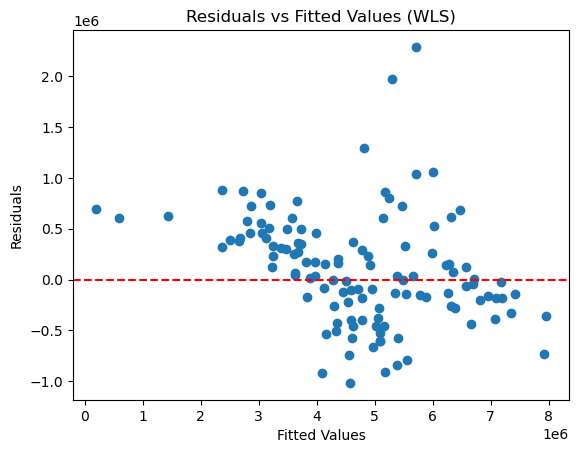

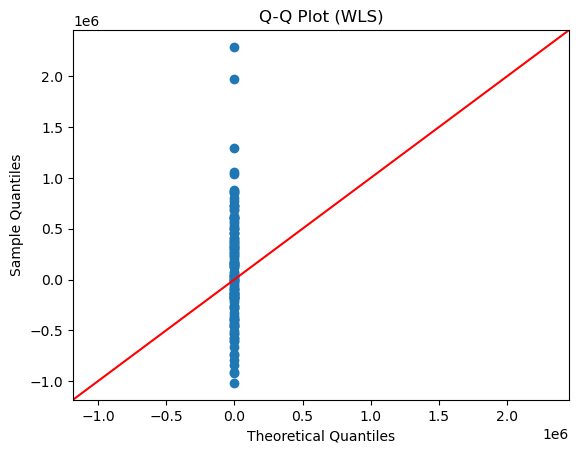

In [297]:
#To overcome the violation of homoscedasticity
# Use the absolute residuals from the initial OLS model to calculate weights
weights = 1 / (residuals ** 2)

# Fit the WLS model
model_wls = sm.WLS(df['Concession'], X, weights=weights).fit()
print(model_wls.summary())

# Step 3: Recheck residuals
fitted_values_wls = model_wls.fittedvalues
residuals_wls = model_wls.resid

# Plot Residuals vs Fitted Values for WLS
plt.scatter(fitted_values_wls, residuals_wls)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values (WLS)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Q-Q Plot for WLS residuals
sm.qqplot(residuals_wls, line='45')
plt.title('Q-Q Plot (WLS)')
plt.show()


In [299]:
#To overcome multicollinearity we use Variance inflation factor to check and remove high VIF variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Calculate VIF for each predictor
X = df[['Parking', 'Rental Car', 'Ground']]
X = sm.add_constant(X)  # Add constant for the intercept

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Output VIF values
print(vif_data)

# Step 2: Remove variables with high VIF
df_reduced = df.drop(columns=['Ground'])  # For example, if 'Ground' has a high VIF

# Fit the OLS model again with reduced set
X_reduced = df_reduced[['Parking', 'Rental Car']]
X_reduced = sm.add_constant(X_reduced)
model_reduced = sm.OLS(df['Concession'], X_reduced).fit()
print(model_reduced.summary())


      feature        VIF
0       const  18.118450
1     Parking   1.818270
2  Rental Car   2.003398
3      Ground   2.124676
                            OLS Regression Results                            
Dep. Variable:             Concession   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     140.0
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           9.24e-32
Time:                        22:48:31   Log-Likelihood:                -1794.0
No. Observations:                 120   AIC:                             3594.
Df Residuals:                     117   BIC:                             3602.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

To improve R square and adjusted R square value
Feature Engineering: Adding interaction terms or polynomial terms.
Regularization: Using Ridge or Lasso to stabilize and regularize the model.
Remove Insignificant Predictors: Drop predictors with high p-values.
Outlier Detection: Remove influential points using Cook's Distance.
Log Transformation: Apply log transformation to reduce skewness in the target variable.
Add More Features: Incorporate additional relevant features to improve the explanatory power of the model.

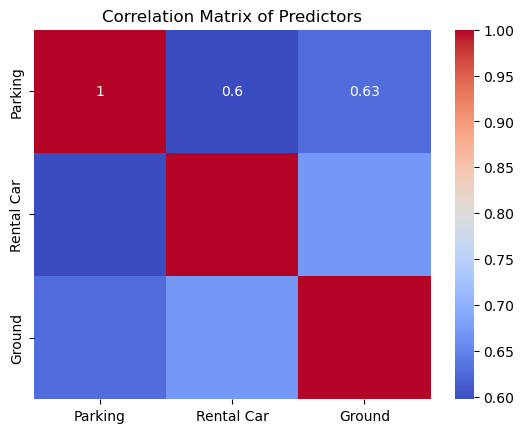

                            OLS Regression Results                            
Dep. Variable:             Concession   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     335.7
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           3.37e-49
Time:                        22:48:34   Log-Likelihood:                -1752.8
No. Observations:                 120   AIC:                             3512.
Df Residuals:                     117   BIC:                             3520.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.965e+05   2.03e+05      4.902      0.0

In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Check correlation between predictors
corr_matrix = df[['Parking', 'Rental Car', 'Ground']].corr()

# Plot the heatmap to visualize correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Predictors')
plt.show()

# If high correlation exists, you can choose to drop one of the variables
df_reduced = df.drop(columns=['Rental Car'])  # Drop the most correlated predictor

# Now fit the OLS model again with the reduced set of predictors
X_reduced = df_reduced[['Parking', 'Ground']]
X_reduced = sm.add_constant(X_reduced)
model_reduced = sm.OLS(df['Concession'], X_reduced).fit()
print(model_reduced.summary())


In [309]:
import pandas as pd
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Step 1: Drop any rows with missing values to avoid misalignment
df_clean = df.dropna(subset=['Concession', 'Parking', 'Rental Car', 'Ground'])

# Step 2: Select the independent variables for PCA
X = df_clean[['Parking', 'Rental Car', 'Ground']]

# Step 3: Perform PCA on the independent variables
pca = PCA(n_components=2)  # You can adjust the number of components
df_pca = pca.fit_transform(X)

# Step 4: Add a constant term to the PCA components for the OLS model
X_pca_ols = sm.add_constant(df_pca)

# Step 5: Fit the OLS model using the dependent variable 'Concession'
model_pca = sm.OLS(df_clean['Concession'], X_pca_ols).fit()

# Print the summary of the OLS model
print(model_pca.summary())


                            OLS Regression Results                            
Dep. Variable:             Concession   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     148.1
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           8.76e-33
Time:                        22:55:10   Log-Likelihood:                -1791.6
No. Observations:                 120   AIC:                             3589.
Df Residuals:                     117   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.83e+06   6.82e+04     70.861      0.0

In [313]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['Parking', 'Rental Car', 'Ground']]
y = df['Concession']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Fit Lasso regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the R-squared values
print(f'R-squared (Ridge): {r2_ridge}')
print(f'R-squared (Lasso): {r2_lasso}')


R-squared (Ridge): 0.8670960822208235
R-squared (Lasso): 0.8670960822208442


In [315]:
# Fit the OLS model only with significant predictors
X_significant = df[['Parking', 'Ground']]  # Drop 'Rental Car' if its p-value is high, for example
X_significant = sm.add_constant(X_significant)

model_significant = sm.OLS(df['Concession'], X_significant).fit()
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:             Concession   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     335.7
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           3.37e-49
Time:                        22:57:24   Log-Likelihood:                -1752.8
No. Observations:                 120   AIC:                             3512.
Df Residuals:                     117   BIC:                             3520.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.965e+05   2.03e+05      4.902      0.0

In [319]:
# Remove outliers using positional indexing with iloc
df_no_outliers = df.drop(df.index[outliers])

# Refit the model without outliers
X_no_outliers = df_no_outliers[['Parking', 'Rental Car', 'Ground']]
y_no_outliers = df_no_outliers['Concession']

# Split data without outliers
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Fit the Ridge regression model without outliers
ridge_model_no_outliers = Ridge(alpha=0.1)
ridge_model_no_outliers.fit(X_train, y_train)

# Evaluate the model
y_pred_train_no_outliers = ridge_model_no_outliers.predict(X_train)
y_pred_test_no_outliers = ridge_model_no_outliers.predict(X_test)

# Print R-squared values
print("Train R-squared (no outliers):", r2_score(y_train, y_pred_train_no_outliers))
print("Test R-squared (no outliers):", r2_score(y_test, y_pred_test_no_outliers))


Train R-squared (no outliers): 0.9240140307056567
Test R-squared (no outliers): 0.9042343590875526


In [321]:
import numpy as np

# Apply log transformation to the target variable
df['Log_Concession'] = np.log(df['Concession'])

# Fit the OLS model with the log-transformed target
X_log = df[['Parking', 'Rental Car', 'Ground']]
X_log = sm.add_constant(X_log)

model_log = sm.OLS(df['Log_Concession'], X_log).fit()
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:         Log_Concession   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     209.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.07e-46
Time:                        22:59:55   Log-Likelihood:                 74.616
No. Observations:                 120   AIC:                            -141.2
Df Residuals:                     116   BIC:                            -130.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2678      0.051    277.849      0.0

In [341]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Drop rows with NaN values introduced by lagging
df = df.dropna()

# Prepare the features and target variable
X = df[['Parking', 'Rental Car', 'Ground', 'UMCSENTLag1', 'UMCSENTLag2', 'UMCSENTLag3']]
y = df['Concession']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Number of observations and predictors
n_train = X_train.shape[0]  # Number of observations in training set
k = X_train.shape[1]  # Number of predictors

# Calculate Adjusted R-squared for the training set
train_adj_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - k - 1)

# Print the results
print("Train R-squared:", train_r2)
print("Train Adjusted R-squared:", train_adj_r2)

# If you want to calculate Adjusted R-squared for the test set
n_test = X_test.shape[0]  # Number of observations in test set
test_adj_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - k - 1)

print("Test R-squared:", test_r2)
print("Test Adjusted R-squared:", test_adj_r2)


Train R-squared: 0.8800618798788171
Train Adjusted R-squared: 0.871694104056409
Test R-squared: 0.8877707142249035
Test Adjusted R-squared: 0.848160378068987


In [343]:
X_additional = df[['Parking', 'Rental Car', 'Ground', 'UMCSENTLag1','UMCSENTLag2','UMCSENTLag3']]
X_additional = sm.add_constant(X_additional)

model_additional = sm.OLS(df['Concession'], X_additional).fit()
print(model_additional.summary())

                            OLS Regression Results                            
Dep. Variable:             Concession   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     138.8
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           6.10e-49
Time:                        23:11:23   Log-Likelihood:                -1695.1
No. Observations:                 117   AIC:                             3404.
Df Residuals:                     110   BIC:                             3424.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.182e+06   5.16e+05      4.230      

In [367]:
#K fold cross validation
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Drop rows with NaN values introduced by lagging
df = df.dropna()

# Prepare the features and target variable
X = df[['Parking', 'Rental Car', 'Ground', 'UMCSENTLag1', 'UMCSENTLag2', 'UMCSENTLag3']]
y = df['Concession']

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=0.1)

# Step 1: Perform k-fold cross-validation
# For example, using 5 folds
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Step 2: Convert scores from negative MSE to positive MSE
mse_scores = -cv_scores

# Step 3: Calculate the average MSE across all folds
average_mse = mse_scores.mean()

print(f'Cross-validated MSE scores for 5 folds: {mse_scores}')
print(f'Average MSE from cross-validation: {average_mse}')

Cross-validated MSE scores for 5 folds: [9.54688455e+10 2.62867493e+11 5.98017476e+11 2.90529868e+11
 4.93422731e+11]
Average MSE from cross-validation: 348061282665.4537


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. 

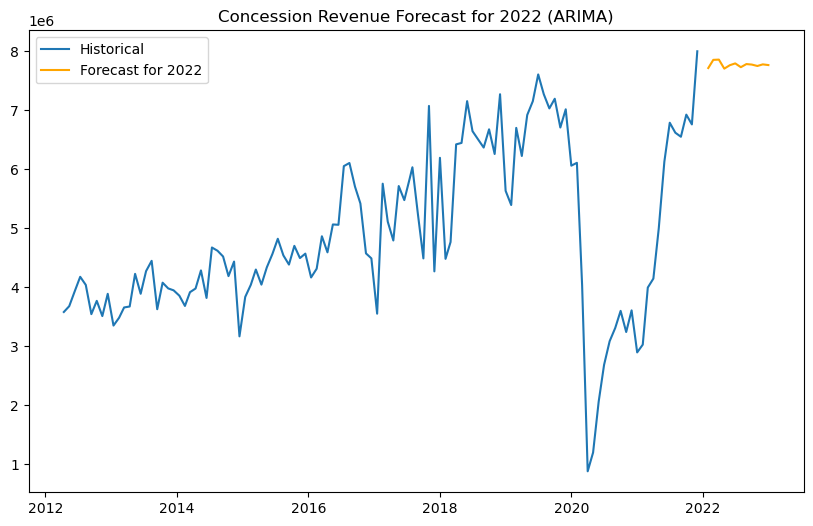

117    7.711921e+06
118    7.850431e+06
119    7.854743e+06
120    7.701898e+06
121    7.760259e+06
122    7.790603e+06
123    7.726552e+06
124    7.779215e+06
125    7.770646e+06
126    7.746825e+06
127    7.774053e+06
128    7.762359e+06
Name: predicted_mean, dtype: float64


In [351]:
#Forecasting model using ARIMA, Exponential Smoothing, SARIMA 
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Forecast 'Concession' revenue using ARIMA (example for one of the revenue streams)
# Order (p, d, q) can be tuned, where:
# p = lag order (autocorrelation)
# d = differencing order (stationarity)
# q = order of moving average

# Fit the ARIMA model
model = ARIMA(df['Concession'], order=(5, 1, 2))
model_fit = model.fit()

# Forecast for 12 months (2022)
forecast = model_fit.forecast(steps=12)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Concession'], label='Historical')
plt.plot(pd.date_range(start='2022-01-01', periods=12, freq='M'), forecast, label='Forecast for 2022', color='orange')
plt.title('Concession Revenue Forecast for 2022 (ARIMA)')
plt.legend()
plt.show()

# Print forecast values
print(forecast)


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in a

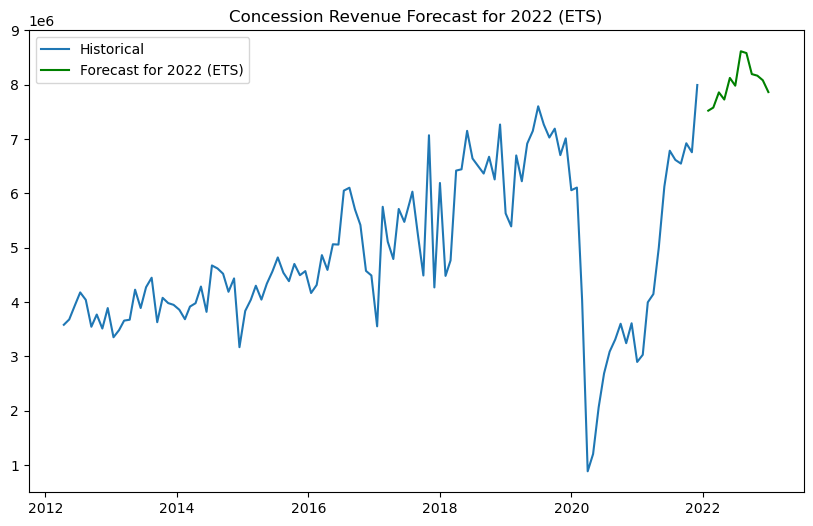

117    7.523189e+06
118    7.580046e+06
119    7.859833e+06
120    7.727932e+06
121    8.125894e+06
122    7.983082e+06
123    8.616449e+06
124    8.583650e+06
125    8.196605e+06
126    8.167120e+06
127    8.083307e+06
128    7.865492e+06
dtype: float64


In [353]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the ETS model with trend and seasonality (e.g., monthly seasonality)
ets_model = ExponentialSmoothing(df['Concession'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast for 12 months (2022)
ets_forecast = ets_model.forecast(steps=12)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Concession'], label='Historical')
plt.plot(pd.date_range(start='2022-01-01', periods=12, freq='M'), ets_forecast, label='Forecast for 2022 (ETS)', color='green')
plt.title('Concession Revenue Forecast for 2022 (ETS)')
plt.legend()
plt.show()

# Print forecast values
print(ets_forecast)


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34929D+01    |proj g|=  6.64234D-02

At iterate    5    f=  1.34804D+01    |proj g|=  3.42417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     11      1     0     0   9.116D-05   1.348D+01
  F =   13.480413053355504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


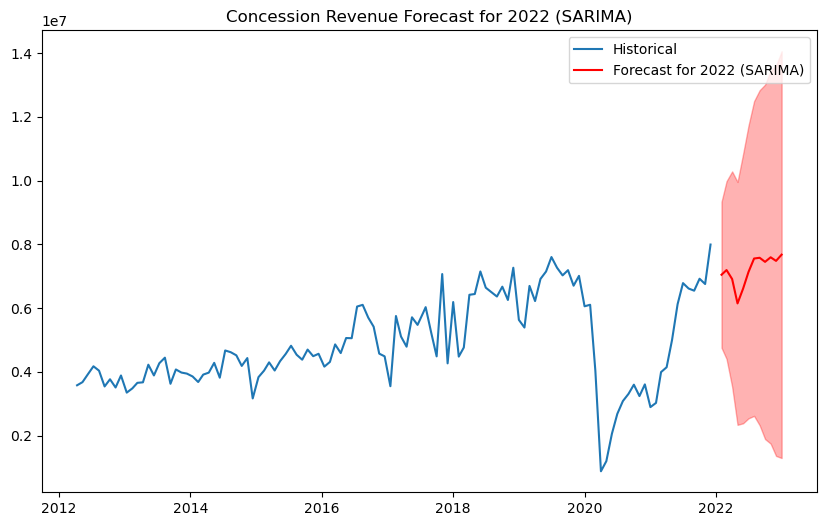

117    7.048345e+06
118    7.195923e+06
119    6.913842e+06
120    6.149851e+06
121    6.613906e+06
122    7.136066e+06
123    7.557247e+06
124    7.581042e+06
125    7.452661e+06
126    7.596089e+06
127    7.483324e+06
128    7.678761e+06
Name: predicted_mean, dtype: float64


In [355]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model (p, d, q) (P, D, Q, S) with seasonality (monthly seasonality, i.e., S=12)
sarima_model = SARIMAX(df['Concession'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Forecast for 12 months (2022)
sarima_forecast = sarima_model.get_forecast(steps=12)
sarima_forecast_ci = sarima_forecast.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Concession'], label='Historical')
plt.plot(pd.date_range(start='2022-01-01', periods=12, freq='M'), sarima_forecast.predicted_mean, label='Forecast for 2022 (SARIMA)', color='red')
plt.fill_between(pd.date_range(start='2022-01-01', periods=12, freq='M'), sarima_forecast_ci.iloc[:, 0], sarima_forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('Concession Revenue Forecast for 2022 (SARIMA)')
plt.legend()
plt.show()

# Print forecast values
print(sarima_forecast.predicted_mean)


In [357]:
from sklearn.metrics import mean_squared_error

# Example: Calculate MSE for ARIMA forecast (or any other model's forecast)
actual = df['Concession'].loc['2021-01-01':'2021-12-31']  # Actual values from 2021 to compare
mse_arima = mean_squared_error(actual, forecast)  # Replace 'forecast' with the actual forecasted values
print(f'MSE (ARIMA): {mse_arima}')


MSE (ARIMA): 7487720785052.728
